http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/

poi provo on line con mybinder.org

In [1]:
%pylab inline
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'SPY']

# Define which online source one should use
data_source = 'google'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data.loc['Close']
# usato .loc invece di .ix

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

close.head(10)

,AAPL,MSFT,SPY
2010-01-01,NaN,NaN,NaN
2010-01-04,30.57,30.95,113.33
2010-01-05,30.63,30.96,113.63
2010-01-06,30.14,30.77,113.71
2010-01-07,30.08,30.45,114.19
2010-01-08,30.28,30.66,114.57
2010-01-11,30.02,30.27,114.73
2010-01-12,29.67,30.07,113.66
2010-01-13,30.09,30.35,114.62
2010-01-14,29.92,30.96,114.93


In [27]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 1762 (major_axis) x 3 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2010-01-04 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AAPL to SPY

In [11]:
panel_data.keys()

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [15]:
adj_close=panel_data.loc['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex adj_close using all_weekdays as the new index
adj_close = adj_close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
adj_close = adj_close.fillna(method='ffill')

In [16]:
adj_close.head(7)

,AAPL,MSFT,SPY
2010-01-01,NaN,NaN,NaN
2010-01-04,30.57,30.95,113.33
2010-01-05,30.63,30.96,113.63
2010-01-06,30.14,30.77,113.71
2010-01-07,30.08,30.45,114.19
2010-01-08,30.28,30.66,114.57
2010-01-11,30.02,30.27,114.73


In [17]:
adj_close.describe()

,AAPL,MSFT,SPY
count,1825.000000,1825.000000,1825.000000
mean,79.413167,37.118405,164.674986
std,28.302440,10.814263,37.049846
min,27.440000,23.010000,102.200000
25%,55.460000,27.840000,131.280000
50%,78.440000,33.030000,165.220000
75%,103.120000,46.110000,201.990000
max,133.000000,63.620000,227.760000


In [20]:
# Get the MSFT time series. This now returns a Pandas Series object indexed by date.
msft = adj_close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()


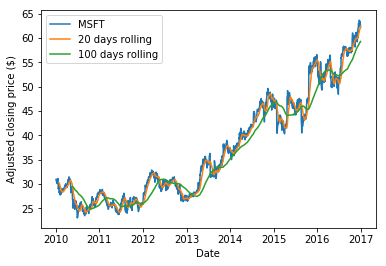

In [21]:
# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()